In [53]:
import pandas as pd
from collections import Counter
import seaborn as sns
import heapq
from matplotlib import pyplot
import seaborn
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup 
import csv
import requests 
import numpy as np
import json
from collections import Counter
import seaborn as sns
import heapq
from matplotlib import pyplot
import seaborn
import matplotlib.pyplot as plt
sub_journal = pd.read_excel(r'/content/Pub_subject_journal_wos.xlsx')

In [2]:
sub_journal["keyword"].head()

0     Neurosciences & Neurology
1     Neurosciences & Neurology
2    Endocrinology & Metabolism
3     Neurosciences & Neurology
4     Neurosciences & Neurology
Name: keyword, dtype: object

In [27]:
sub_journal["keyword"].dropna()

0                Neurosciences & Neurology
1                Neurosciences & Neurology
2               Endocrinology & Metabolism
3                Neurosciences & Neurology
4                Neurosciences & Neurology
                        ...               
207409    Education & Educational Research
207410                         Engineering
207418                    Computer Science
207419                         Engineering
207420                         Engineering
Name: keyword, Length: 194946, dtype: object

In [30]:
counter = Counter(sub_journal["keyword"].dropna())

In [43]:
print(counter)
print(len(counter))

Counter({'Engineering': 21114, 'Chemistry': 13222, 'Physics': 11437, 'Agriculture': 7751, 'Biochemistry & Molecular Biology': 7308, 'Environmental Sciences & Ecology': 6530, 'Materials Science': 6234, 'Computer Science': 5976, 'Science & Technology - Other Topics': 5773, 'Veterinary Sciences': 4409, 'Mathematics': 4205, 'Psychology': 3496, 'Cell Biology': 3471, 'Optics': 3430, 'Business & Economics': 2849, 'Neurosciences & Neurology': 2810, 'Astronomy & Astrophysics': 2356, 'Genetics & Heredity': 2346, 'Plant Sciences': 2333, 'Biotechnology & Applied Microbiology': 2187, 'Energy & Fuels': 2170, 'Food Science & Technology': 2170, 'Life Sciences & Biomedicine - Other Topics': 2134, 'Mechanics': 2122, 'Public, Environmental & Occupational Health': 2104, 'Telecommunications': 1962, 'Automation & Control Systems': 1914, 'Geology': 1894, 'Meteorology & Atmospheric Sciences': 1888, 'Water Resources': 1809, 'Pharmacology & Pharmacy': 1792, 'Reproductive Biology': 1771, 'Instruments & Instrumen

['Engineering' 'Chemistry' 'Physics' 'Agriculture'
 'Biochemistry & Molecular Biology' 'Environmental Sciences & Ecology'
 'Materials Science']
[21114 13222 11437  7751  7308  6530  6234]


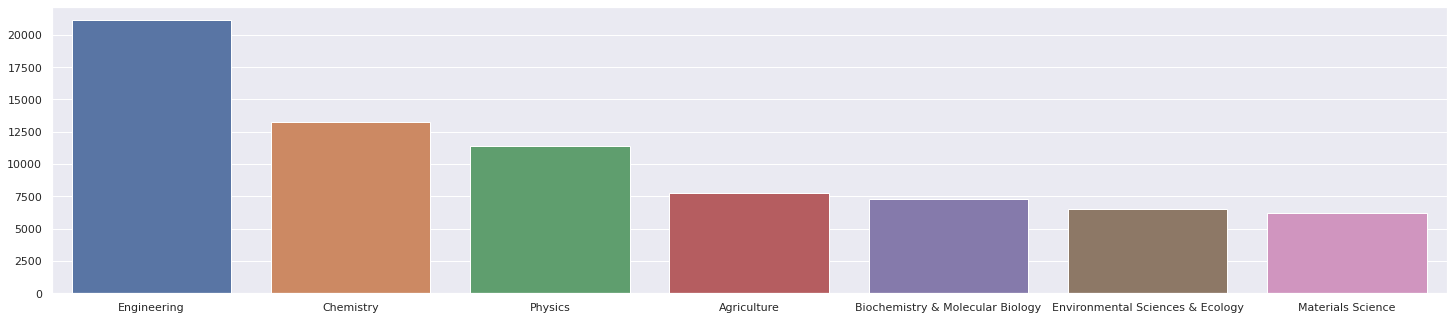

In [42]:

sns.set_theme(style="whitegrid")
top_n = counter.most_common(7) 
keys = np.array((list(zip(*top_n))[0]))
vals = np.array(list(zip(*top_n))[1])
print(keys)
print(vals)
sns.set(rc={'figure.figsize':(25,5.27)})
sns.barplot(x=keys, y=vals)
plt.show()

In [47]:
unsdg = pd.read_excel(r'/content/Pub_unsdg.xlsx')
unsdg["publication_api"]

0        https://api.library.tamu.edu/scholars-discover...
1        https://api.library.tamu.edu/scholars-discover...
2        https://api.library.tamu.edu/scholars-discover...
3        https://api.library.tamu.edu/scholars-discover...
4        https://api.library.tamu.edu/scholars-discover...
                               ...                        
14149    https://api.library.tamu.edu/scholars-discover...
14150    https://api.library.tamu.edu/scholars-discover...
14151    https://api.library.tamu.edu/scholars-discover...
14152    https://api.library.tamu.edu/scholars-discover...
14153    https://api.library.tamu.edu/scholars-discover...
Name: publication_api, Length: 14154, dtype: object

In [48]:
pub_api = unsdg[["publication_api", "name"]]

In [49]:
pub_api_sortedby_name = pub_api.groupby(by=["name"])

In [50]:
concentration = []
dic = {}
index = 0
for key, item in pub_api_sortedby_name:
    concentration = []
    for url_ in pub_api_sortedby_name.get_group(key)['publication_api']:
      if (url_):
        response_API = requests.get(url_)
                  
        if response_API.status_code == 200:
          data = response_API.text          
          parse_json = json.loads(data)
          if 'authors' in parse_json:
            label = parse_json['authors'][0]
            if 'organizations' in label:
              org = label['organizations']
              areas = org[0]['label']    
              concentration.append(areas)    
    dic[key] = concentration
    index = index + 1

['Sociology' 'Psychiatry and Behavioral Sciences' 'Educational Psychology']
[8 6 4]


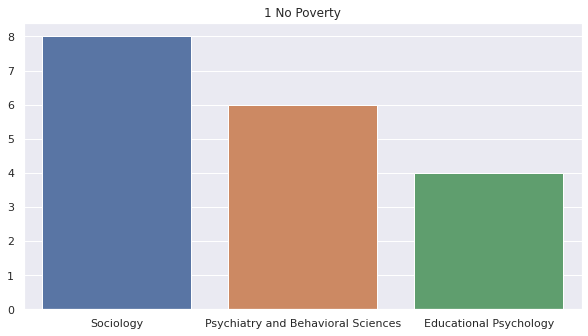

['Mathematics' 'Sociology' 'Science (Qatar)']
[63 45 19]


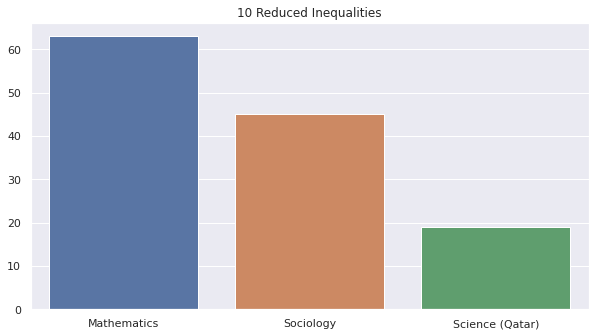

['Landscape Architecture and Urban Planning' 'Civil Engineering'
 'Center for Health Systems and Design']
[97 92 65]


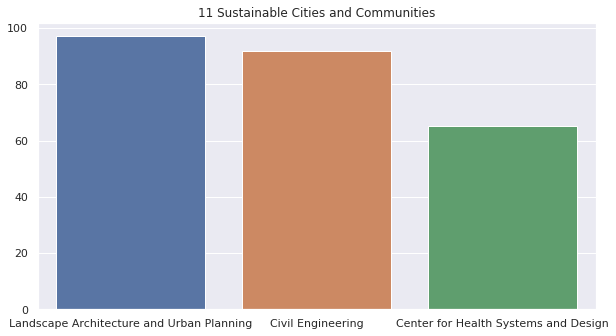

['Energy Institute' 'Engineering Technology and Industrial Distribution'
 'Soil and Crop Sciences']
[36 22 14]


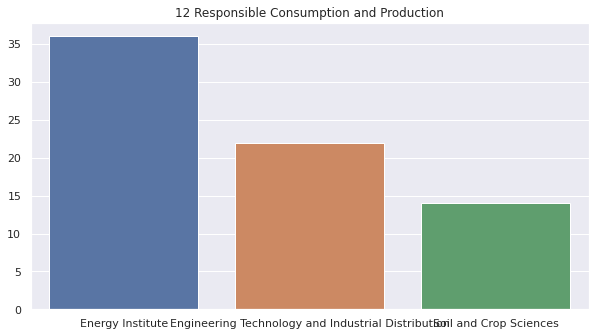

['Energy Institute' 'Biological and Agricultural Engineering'
 'Atmospheric Sciences']
[415 186 158]


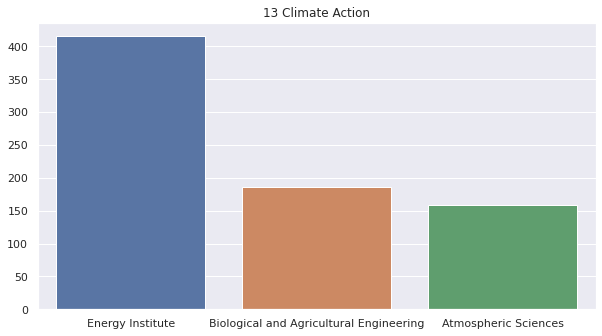

['Oceanography'
 'Texas A&M University - Corpus Christi - (Corpus Christi, Texas, United States)'
 'Marine Biology']
[26 20 17]


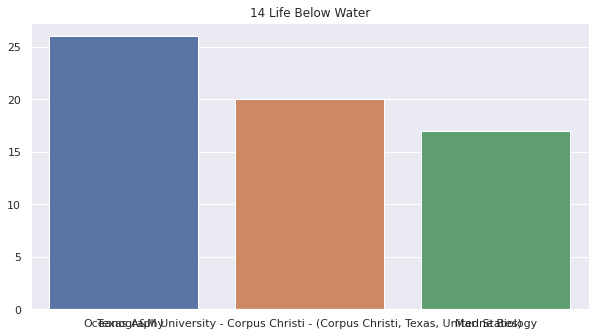

['Ecology and Conservation Biology' 'Wildlife and Fisheries Sciences'
 'Geography']
[34 20 15]


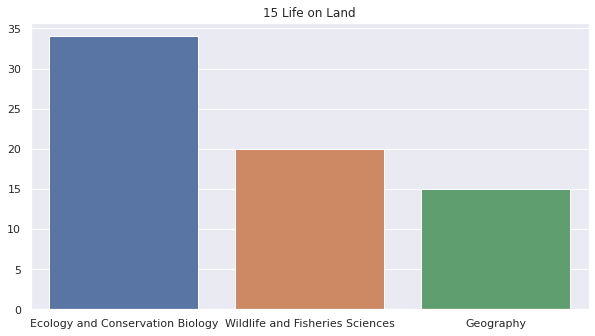

['Political Science' 'Psychological and Brain Sciences' 'Sociology']
[69 50 40]


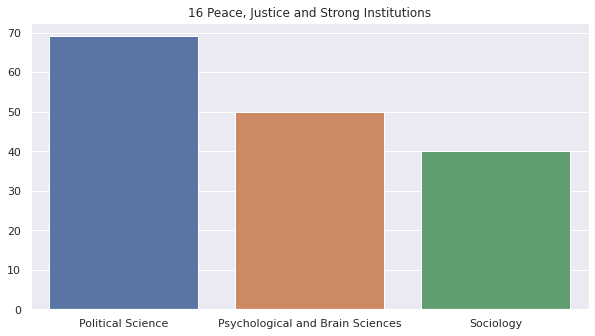

['Environmental and Occupational Health' 'Health and Kinesiology'
 'Chemistry']
[2 1 1]


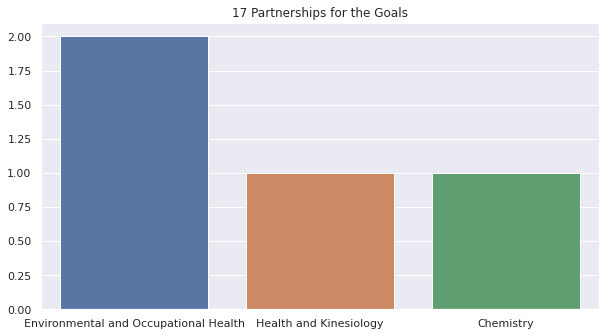

['Health Promotion and Community Health Sciences' 'Energy Institute'
 'Veterinary Integrative Biosciences']
[30 25 24]


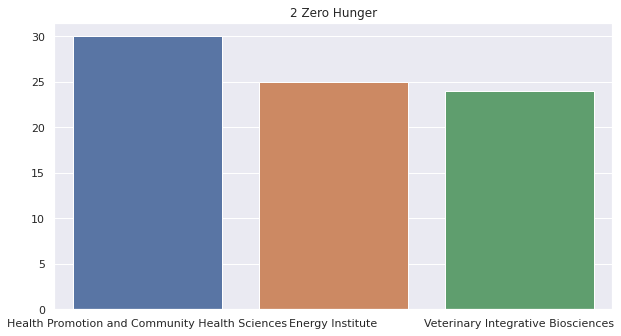

['Veterinary Integrative Biosciences' 'Entomology' 'Civil Engineering']
[141 126 110]


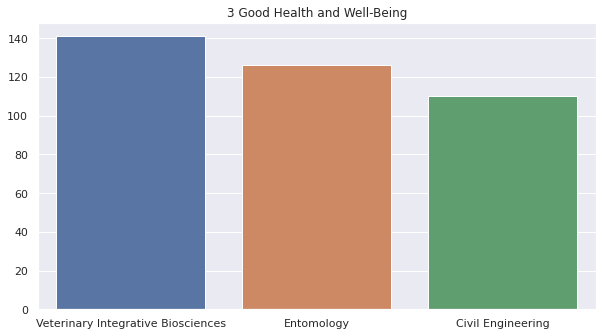

['Educational Psychology' 'Teaching, Learning and Culture'
 'Educational Administration and Human Resource Development']
[175 173  64]


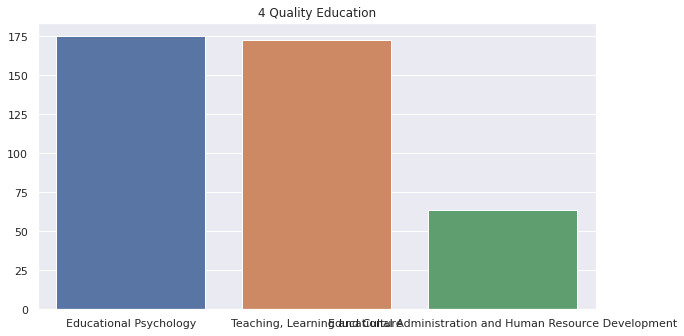

['Political Science' 'Psychological and Brain Sciences' 'Communication']
[5 3 3]


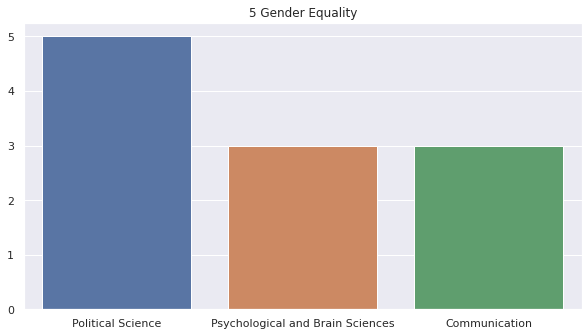

['Biological and Agricultural Engineering' 'Energy Institute'
 'Soil and Crop Sciences']
[78 50 33]


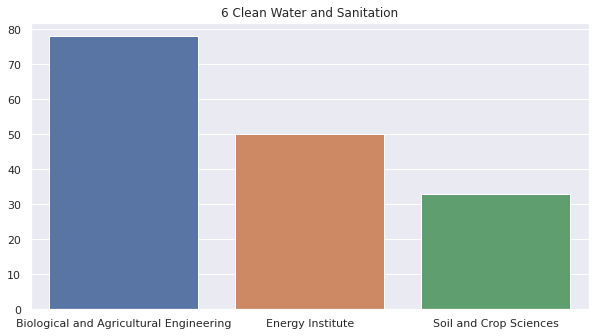

['Energy Institute' 'Mechanical Engineering'
 'Electrical and Computer Engineering']
[1388  636  319]


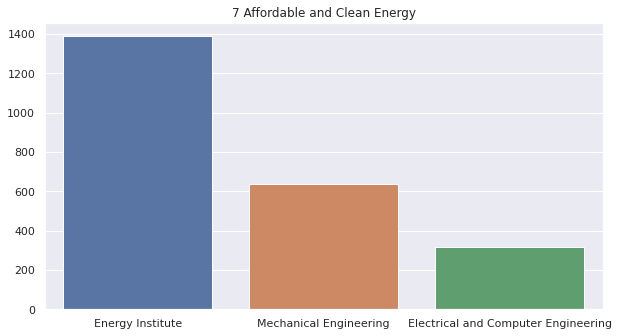

['Economics' 'Management' 'Sociology']
[20 18 16]


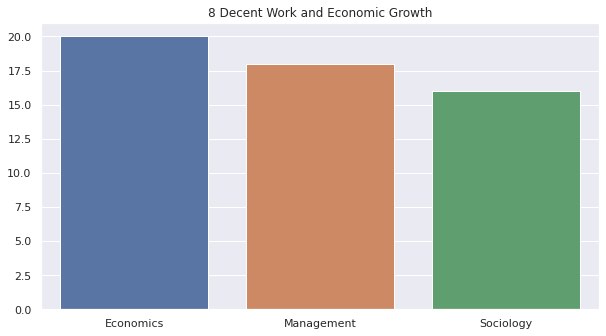

['Civil Engineering' 'Energy Institute'
 'Landscape Architecture and Urban Planning']
[29  6  5]


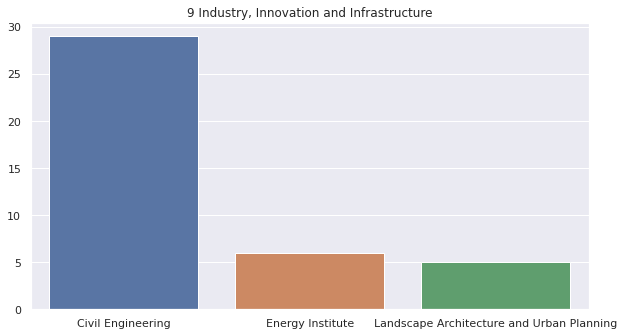

In [65]:
for key, values in dic.items():
    concentration_areas = Counter(values)
    sns.set_theme(style="whitegrid")
    top_n = concentration_areas.most_common(3) 
    keys = np.array((list(zip(*top_n))[0]))
    vals = np.array(list(zip(*top_n))[1])
    print(keys)
    print(vals)
    sns.set(rc={'figure.figsize':(10,5.27)})
    sns.barplot(x=keys, y=vals).set(title=key)
    plt.show()
    

In [227]:

def finding_most_freq_dpt_for_topic(count):
  topic = []
  dic_keys = {}
  dic_vals = {}
  dic_topic = {}
  data = {}

  new_df = pd.DataFrame()
  for key, values in dic.items():
      concentration_areas = Counter(values)
      sns.set_theme(style="whitegrid")
      top_n = concentration_areas.most_common(count) 
      keys = np.array((list(zip(*top_n))[0]))
      vals = np.array(list(zip(*top_n))[1])
      for j in range (len(vals)):
          
          temp = key.split(" ")[1:]
          temp = ' '.join(temp)        
          topic.append(temp)

      dic_keys['Institute'] = list(keys)
      dic_vals['Frequencies'] = list(vals)
      dic_topic['Topic'] = list(topic)

      data['Topic'] = list(topic)
      data['Institute'] = list(keys)
      data['Frequencies'] = list(vals)        
      df = pd.DataFrame(data)
      new_df = new_df.append(df, ignore_index = True)
      #print(df)
      topic = []
      #print(list(zip(*top_n))) 
  return new_df

In [234]:
get_df = pd.DataFrame()
get_df = finding_most_freq_dpt_for_topic(1)


In [235]:
get_df

,Topic,Institute,Frequencies
0,No Poverty,Sociology,8
1,Reduced Inequalities,Mathematics,63
2,Sustainable Cities and Communities,Landscape Architecture and Urban Planning,97
3,Responsible Consumption and Production,Energy Institute,36
4,Climate Action,Energy Institute,415
5,Life Below Water,Oceanography,26
6,Life on Land,Ecology and Conservation Biology,34
7,"Peace, Justice and Strong Institutions",Political Science,69
8,Partnerships for the Goals,Environmental and Occupational Health,2
9,Zero Hunger,Health Promotion and Community Health Sciences,30


[Text(0, 0, 'No Poverty'),
 Text(0, 0, 'Reduced Inequalities'),
 Text(0, 0, 'Sustainable Cities and Communities'),
 Text(0, 0, 'Responsible Consumption and Production'),
 Text(0, 0, 'Climate Action'),
 Text(0, 0, 'Life Below Water'),
 Text(0, 0, 'Life on Land'),
 Text(0, 0, 'Peace, Justice and Strong Institutions'),
 Text(0, 0, 'Partnerships for the Goals'),
 Text(0, 0, 'Zero Hunger'),
 Text(0, 0, 'Good Health and Well-Being'),
 Text(0, 0, 'Quality Education'),
 Text(0, 0, 'Gender Equality'),
 Text(0, 0, 'Clean Water and Sanitation'),
 Text(0, 0, 'Affordable and Clean Energy'),
 Text(0, 0, 'Decent Work and Economic Growth'),
 Text(0, 0, 'Industry, Innovation and Infrastructure')]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

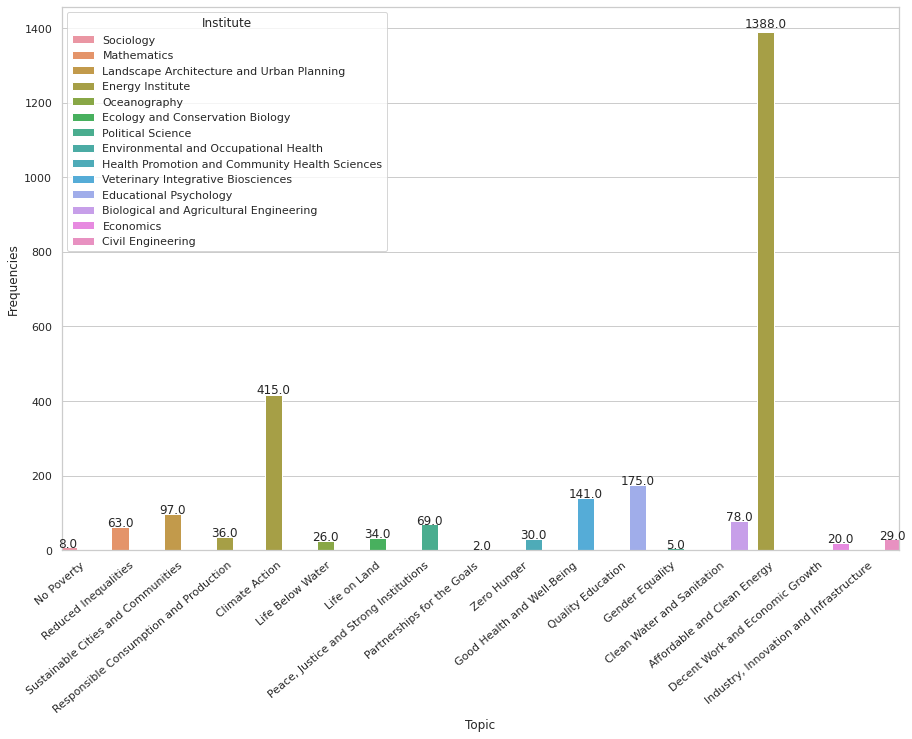

In [236]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(15,10)) #adjust the size of plot
ax= sns.barplot(data = get_df,x="Topic", y="Frequencies", hue="Institute")

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

#reference https://www.statology.org/seaborn-barplot-show-values/

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

change_width(ax, .35)
show_values(ax)
ax.set_xticklabels(get_df['Topic'], rotation=40, ha="right")  #it will rotate text on x axis


In [238]:
get_df = pd.DataFrame()
get_df = finding_most_freq_dpt_for_topic(3)

In [239]:
get_df

,Topic,Institute,Frequencies
0,No Poverty,Sociology,8
1,No Poverty,Psychiatry and Behavioral Sciences,6
2,No Poverty,Educational Psychology,4
3,Reduced Inequalities,Mathematics,63
4,Reduced Inequalities,Sociology,45
5,Reduced Inequalities,Science (Qatar),19
6,Sustainable Cities and Communities,Landscape Architecture and Urban Planning,97
7,Sustainable Cities and Communities,Civil Engineering,92
8,Sustainable Cities and Communities,Center for Health Systems and Design,65
9,Responsible Consumption and Production,Energy Institute,36


In [ ]:
while True:pass